In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
with open("fitness data/baseline_solvers_vs_eval.json", "r") as f:
    baseline_fitnesses = json.load(f)
with open("fitness data/first_pass_v3_generation.json", "r") as f:
    first_pass = json.load(f)

In [10]:
task_labels = [entry[0] for entry in baseline_fitnesses]

In [14]:
baseline_fitnesses[0][1][0][1]

0.0

In [17]:
D = {label: [] for label in task_labels}
for entry in baseline_fitnesses:
    D[entry[0]].append(entry[1][0][1])
for entry in first_pass:
    D[entry[0]].append(entry[1][0][1])

In [26]:
best_fitnesses = pd.DataFrame.from_dict(D, orient = 'index')
best_fitnesses.columns = ['baseline', 'fp']

In [28]:
best_fitnesses['diff'] = best_fitnesses['baseline'] - best_fitnesses['fp']

In [30]:
best_fitnesses[best_fitnesses['diff'] > 0]

,baseline,fp,diff
14754a24,0.024656,0.018082,0.006574
60a26a3e,0.040102,0.025890,0.014212
0607ce86,0.041696,0.039960,0.001736
32e9702f,0.066230,0.039890,0.026340
12997ef3,0.285579,0.250851,0.034728
1a6449f1,0.396403,0.367245,0.029158


**Abysmal!** Only six were improved by first pass. However, we only generated 50 solvers per task from CodeGen

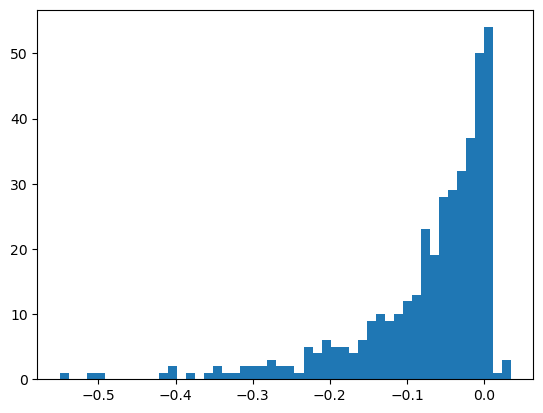

In [34]:
plt.hist(best_fitnesses['diff'], bins = 50)
plt.show()

Mostly the first pass doesn't get too much worse

In [35]:
sum(best_fitnesses['diff'] == 0)

50

For 50 tasks, we exactly matched the baseline

In [40]:
best_fitnesses.head(35)

,baseline,fp,diff
c663677b,0.000000,0.075285,-0.075285
e95e3d8e,0.000000,0.079552,-0.079552
60c09cac,0.000000,0.302237,-0.302237
73182012,0.000000,0.399941,-0.399941
9ddd00f0,0.000000,0.080540,-0.080540
cd3c21df,0.000000,0.291996,-0.291996
67b4a34d,0.000000,0.353476,-0.353476
f4081712,0.000000,0.407452,-0.407452
070dd51e,0.000000,0.027177,-0.027177
ca8f78db,0.000000,0.004228,-0.004228


Concerningly, diff is big even for tasks where a verifier or solver gets fitness 0

In [42]:
for i in range(35):
    print(baseline_fitnesses[i][0], baseline_fitnesses[i][1][:3])

c663677b [['solve_0dfd9992', 0.0], ['solve_29ec7d0e', 0.0], ['solve_484b58aa', 0.0]]
e95e3d8e [['solve_0dfd9992', 0.0], ['solve_29ec7d0e', 0.0], ['solve_484b58aa', 0.0]]
60c09cac [['solve_b91ae062', 0.0], ['solve_c59eb873', 0.0], ['verify_b91ae062', 0.0]]
73182012 [['solve_2013d3e2', 0.0], ['solve_90c28cc7', 0.0], ['verify_2013d3e2', 0.0]]
9ddd00f0 [['solve_9d9215db', 0.0], ['solve_b8825c91', 0.0], ['verify_b8825c91', 0.0]]
cd3c21df [['solve_ce602527', 0.0], ['verify_0b148d64', 0.0], ['verify_1f85a75f', 0.0]]
67b4a34d [['solve_dc0a314f', 0.0], ['verify_dc0a314f', 0.0], ['verify_ff805c23', 0.0]]
f4081712 [['solve_dc0a314f', 0.0], ['verify_dc0a314f', 0.0], ['verify_ff805c23', 0.0]]
070dd51e [['solve_40853293', 0.0], ['verify_40853293', 0.0], ['solve_1f876c06', 0.0019801980198019802]]
ca8f78db [['solve_0dfd9992', 0.0], ['solve_29ec7d0e', 0.0], ['solve_3345333e', 0.004228097236670613]]
7039b2d7 [['verify_780d0b14', 0.0], ['verify_9f236235', 0.0], ['solve_1190e5a7', 0.03580246913580246]]
c7

The following all have verifiers but not solvers that beat them!

For tasks `7039b2d7`, `e66aafb8`, `47996f11`, `981571dc`, `af22c60d`, `ea959feb`, `e1baa8a4`, `50a16a69`, `506d28a5`, `aa18de87`, `aa18de87`, `5b6cbef5`, ``, ``, ``, ``, ``, ``, ``, 

`7039b2d7`, `e66aafb8`, `47996f11`, `981571dc`, `af22c60d`, `ea959feb`, `e1baa8a4`, `50a16a69`, `506d28a5`, `aa18de87`, `5b6cbef5`, `68b67ca3`, `e7a25a18`, `0c9aba6e`